# Title: BART: Denoising Sequence-to-Sequence Pre-training for Natural Language Generation, Translation, and Comprehension

#### Group Members' Names: Hina Shafique Awan, Sidda De Silva


#### Group Members' Emails: hina.awan@ryerson.ca , ravindra.desilva@ryerson.ca

# 1. Introduction:

## 1.1 Problem Description:

The emergence of pre-trained models has revolutionized the applications of natural language processing. However, most of the pre-trained models do not perform well across different tasks limiting their applicability. The key objective of this study is to come up with a Neural Network architecture and pre-training methods for a language model with wider applicability.

## 1.2 Context of the Problem:

Neural networks for language modeling have been proven effective and accurate over statistical language modeling. However, training deep language models is time-consuming and computationally intensive. Pre-trained language models are appealing and have become an industry standard given the state-of-the-art performance, and also the fact that pre-trained models are available for general immediate use. Practitioners can focus on the actual Natural Language Processing (NLP) task than spending the time, hardware, and data to train models.

The benefit of pre-trained language models is that they can function as a black box that understands the language and can then be utilized to perform any specific task in that language. A Pre-trained language model is the machine equivalent of a human being who deeply understands the language. Pre-trained models can be easily incorporated into new applications as they don't need much-labeled data, making them adaptable to various business problems, prediction, transfer learning, or feature extraction. Like the human counterpart, the pre-training model should be trained on a large corpus. It is not possible to label such a large dataset, therefore self-supervised training is required.

The Masked Language model is the most remarkable approach in self-supervised NLP training. However, many of the masking methods (noising schemes) are task-specific and do not generate a generic language model. BART is a Neural Network model which combines both Bidirectional and Auto-Regressive Transformers and pre trains a model using a combination of noising schemes. It can be seen as generalizing many pretraining schemes and achieving noising flexibility.




## 1.3 Limitation About other Approaches:

### 1.3.1 BERT: 
Random tokens are replaced with masks, and the document is bidirectionally encoded. BERT does not perform very well on downstream text generation tasks as the masked tokens are predicted independently of each other.

### 1.3.2 GPT: 
Tokens are predicted auto-regressively.  This means that each new prediction uses previously predicted tokens as context. This helps it perform very well on downstream text generation tasks. However, words can only condition in a leftward context, so they cannot learn bidirectional interactions.

There are many masked training approaches, and some of these methods typically focus on particular types of end tasks (e.g., span prediction, generation, etc.), therefore not useful to train a generic language model.

## 1.4 Solution:

To pre-train a model, BART uses a combination of bidirectional and auto-regressive transformers. This technique has several advantages, including the ability to apply arbitrary alterations to the original text, such as adjusting its length. The research compares a variety of noise reduction techniques, determining the best results by shuffling the sequence of the original phrases at random and employing a new in-filling strategy in which any length text spans (including zero-length) are replaced with a single mask token.  By requiring the model to reason more about overall sentence length and apply longer-range modifications to the input, this technique generalizes BERT’s original word masking and next sentence prediction aims.

# 2. Background

The related work is shown in the following table:

| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Radford et al. [7] | GPT(Generative Pre-Training) proposes generative pre-training of a language model on a diverse corpus of unlabeled text, followed by discriminative fine-tuning on each specific task like textual entailment, question answering, semantic similarity assessment, and document classification.| For natural language inference task: SNLI, MultiNLI, Question NLI, RTE, SciTail, For Question Answering task: RACE, Story Cloze, For sentence similarity task: MSR Paraphrase Corpus, Quora Question Pairs, STS Benchmark, For Classification task: Stanford Sentiment Treebank-2, CoL. An improvement of 8.9% on commonsense reasoning (Stories Cloze Test), 5.7% on question answering (RACE), and 1.5% on textual entailment (MultiNLI) has been acheived. | only models leftward context, which is problematic for some tasks.
| Devlin et al. [5] | BERT introduced masked language modelling, which allows pre-training to learn interactions between left and right context words. Predictions are not made auto-regressively which reduces the effectiveness of BERT for generation tasks.| GLUE, MultiNLI, SQUAD v1.1, SQUAD v2.0. GLUE score is 80.5%, MultiNLI accuracy is 86.7%, F1 score of SQUAD v1.1 is 93.2, F1 score of SQUAD v2.0 is 83.1| Predictions are not made auto-regressively, reducing the effectiveness of BERT for generation tasks.
| Dong et al. [6] | UniLM is pretrained using three types of language modeling tasks: unidirectional, bidirectional, and sequence-to-sequence prediction for downstream tasks like extractive question answering, long text generation and abstractive summatization, repectively.| CNN/DailyMail and Gigaword abstractive summarization, SQuAD question generation, CoQA generative question answering, and DSTC7 dialog response generation. Experimental results demonstrate that the model compares favorably with BERT on the GLUE benchmark and two question answering datasets. |  UniLM predictions are conditionally independent.
| Lewis et al. [4] | BART is a denoising autoencoder built with a sequence-to-sequence model that is applicable in several ways for the target applications.| SQUAD for question answering, MNLI for classification, XSum for news summarization, ConvAI2 for dialogue response, ELI5 dataset for abstrative QA, CNN/Daily Mail data set for summarization | The strength of BART is also its weakness. The pretraining experimentation was to generate a generic language model that could be used across multiple downstream fine-tuning end tasks. Future work should then explore new methods of corrupting documents, maybe with the intent of being specific for certain downstream fine-tuning end tasks than being generic.



# 3. Methodology

## 3.1 Neural Network Architecture
To understand the architecture of BART, it is important to comprehend the nature of the NLP tasks it aims to deal with. In-text summarization and question answering tasks, it is essential for the model to read the entire text and interpret each token in the context of what came before and after it. For example, to train a masked language model with the sentence “I am following a lecture in Natural Language Processing at a university”, the following masked sentence can be used.

“I am following an [MASK] in Natural Language Processing at a university”.

For a Natural Language Understanding (NLU) problem like this, it is important to completely read the sentence before predicting the [Mask] as it is highly dependent on the words "university" and "following". The bi-directional approaches to reading and representing a text can properly interpret input sequences in these cases. BERT (Devlin et al., 2019) introduced masked language
modeling, allowing pre-training to learn interactions between left and right context words, hence improving the task of language modeling.

BART uses the bi-directional encoder of BERT to find the best representation of its input sequence. The BERT encoder produces an embedding vector of each token of its input text sequence and an extra vector of sentence-level information. This helps the decoder learn token and sentence level tasks which help in fine-tuning future tasks.

The masked sequences are used in the pre-training process as shown in Figure 1. While a simple token masking technique is used in pre-training the BERT model, BART utilizes a more challenging masking procedure in its pre-training.

Figure 1: Bidirectional Encoder


![Encoder](images/encoder.png)

A decoder is needed, after getting the representations of an input text sequence, to map these with the target output. However, if the decoder is designed in a similar way, it can perform poorly on next sentence prediction and token prediction tasks as it depends on more diverse input.

In such cases, a model architecture is needed that can be trained on producing the next word by only examining preceding words in the sequence. Hence, an autoregressive model is useful as it only looks at the past data to predict the future. 

The Figure 2 shows how the autoregressive decoder processes its input.

Figure 2: Auto-regressive Decoder


![Decoder](images/auto-decoder.png)

BART attaches the bi-directional encoder to the autoregressive decoder to create a denoising auto-encoder architecture. Therefore, the architecture is that of a typical sequence-to-sequence transformer as seen below. Both sections of the Transformer architecture are used in sequence-to-sequence models. There would be many layers of encoders and decoders stacked. The base BART Model has 6 encoders and decoders, and the large Model has 12 layers each.  The final BART model would look something like in Figure 3:

Figure 3: BART Model


![transformer](images/transformer.png)

The encoder's attention layers can access all the words in the original phrase at each step, but the decoder's attention layers can only access the words positioned before a particular word in the input. ReLU activation functions are used in traditional Sequence-to-Sequence models, although BART employs GeLUs. In the most recent Transformers, the GeLU activation function was employed in Google's BERT and OpenAI's GPT-2.
 
\begin{align}
GELU(x) = \text0.5x\begin{pmatrix}\text1+\tanh\begin{pmatrix}\sqrt{\frac{2}{\pi}}(x+0.044715x^3)\end{pmatrix}\end{pmatrix}
\end{align}

The Gelu function is as shown in Figure 4.

Figure 4: GeLU Function

![gelu](images/gelu.png)

### 3.1.1 Learning

Figure 5: Bidirectional Encoder Auto-regressive Decoder


![encoder-decoder](images/encoder-decoder.png)

In the above Figure 5, the input sequence is a masked (or noisy) version of [ABCDE] transformed into [A[MASK]B[MASK]E]. The encoder examines the whole sequence and learns high-dimensional representations with bi-directional information. The autoregressive decoder takes these thought vectors and predicts the next token based on the encoder input and the output tokens predicted so far. Learning occurs by computing and optimizing the negative log-likelihood as mapped with the target [ABCDE]. 

The following Figure 6 is a simplified view of the learning process.

Figure 6: BART Training Process


![bart-training](images/bart-training.png)

## 3.2 Pretraining objectives/tasks
BART architecture is quite similar to a typical sequence-to-sequence transformer. The main improvement through BART is an exploration of the numerous pretraining activities. Many other models picked a training objective and measured the performance improvement. However, in BART training many pre-training tasks were carried over numerous datasets to identify the effectiveness.

The goal of the pretraining exercises is to recover from document corruption. There are five different sorts of "noising" methods employed as can be seen in Figure 7. The model will learn to generalize by using multiple tasks.

Figure 7: Pretraining Tasks


![masking](images/masking.png)

### 3.2.1 Token masking
Follows BERT where some tokens are masked, and the model needs to predict the masked token.

### 3.2.2 Token deletion
Delete token and make the model to restore deleted token at the right position.

### 3.2.3 Text infilling
Multiple words are selected in a span, and replaced with single MASK token. This will teach model to predict how many tokens are missing.

### 3.2.4 Sentence permutation
Shuffle sentences and make model restore them.

### 3.2.5 Document rotation
Select random token. Change document ordering to start from selected token. Make model predict the start of the original document.

# 4. Implementation

The original implementation of the paper is in the [initial commit at fairseq github repository](https://github.com/pytorch/fairseq/commit/a92bcdad5a0dea6a440cc92976e4166811b16671). Thereafter there have been many improvements to the model at [fairseq github repository](https://github.com/pytorch/fairseq/tree/main/fairseq/models/bart). However, the [Huggingface implementation](https://github.com/huggingface/transformers/tree/main/src/transformers/models/bart) is the more standard and reference in the project. Huggingface contains transformer library code which BART implementation was able to base on.

Unlike BERT, which only has an encoder, and GPT, which only has a decoder, BART has both an encoder and a decoder. 

class BartModel(BartPretrainedModel):
    def __init__(self, config: BartConfig):
        super().__init__(config)

        padding_idx, vocab_size = config.pad_token_id, config.vocab_size
        self.shared = nn.Embedding(vocab_size, config.d_model, padding_idx)

        self.encoder = BartEncoder(config, self.shared)
        self.decoder = BartDecoder(config, self.shared)

The encoder has multiple encoder layers and a positional embedding layer.

      self.embed_positions = BartLearnedPositionalEmbedding(
            config.max_position_embeddings,
            embed_dim,
        )
        self.layers = nn.ModuleList([BartEncoderLayer(config) for _ in range(config.encoder_layers)])
        self.layernorm_embedding = nn.LayerNorm(embed_dim)


The decoder also has multiple decoder layers and a positional embedding layer.

        self.embed_positions = BartLearnedPositionalEmbedding(
            config.max_position_embeddings,
            config.d_model,
        )
        self.layers = nn.ModuleList([BartDecoderLayer(config) for _ in range(config.decoder_layers)])
        self.layernorm_embedding = nn.LayerNorm(config.d_model)

Each encoder and decoder layer has self attention which is Multi-headed attention.

    self.self_attn = BartAttention(
            embed_dim=self.embed_dim,
            num_heads=config.decoder_attention_heads,
            dropout=config.attention_dropout,
            is_decoder=True,
        )

In terms of tokenization BART uses byte-level Byte-Pair-Encoding.

## 4.1 Fine tuning

Pretraining is the process of training a model from the ground up: the weights are set at random, and the training begins with no past information. This sort of model creates a statistical comprehension of the language it was trained on, but it isn't very effective for specific tasks. On the other hand, fine-tuning refers to the training that occurs after a model has been pre-trained. As a result, the general pre-trained model undergoes a process known as transfer learning. The model is fine-tuned in a supervised manner — that is, using human-annotated labels — on a specific task during this process. The question arises, why not just train for the final task straight away? There are several factors at play: 

- The pretrained model had already been trained on a dataset that resembled the fine-tuning dataset in certain ways. As a result, the fine-tuning procedure might benefit from the knowledge gained by the original model during pretraining.  In NLP tasks, the pretrained model will have some statistical grasp of the related language.
- Because the pre-trained model has already been trained on a large amount of data, fine-tuning takes far less data to achieve acceptable results. As a result, the time and resources required to get good outcomes are significantly reduced.  For example, a science/research-based model may be created by using a pre-trained model trained on the English language and then fine-tuning it on an arXiv corpus. 
- The fine-tuning will only need a little quantity of data: the information obtained by the pre-trained model is "transferred," which is why it is named transfer learning. 

The following are a few NLP final tasks using the pre-trained BART model

### 4.1.1 Text summarization

Text summarization reduces the number of sentences and words in a document while preserving its meaning. Instead of training on a large corpus, the BART pre-trained model is used. BART pre-trained model already captured the patterns in the English language. Then BART pre-trained model is fine-tuned on CNN Daily Mail data. Therefore, the final fine-tuned model has captured the specifics of the CNN Daily Mail on top of the general BART language model.
The input sequence is fed to the encoder, while the decoder autoregressively generates output as can be seen in Figure 8.

Figure 8: Text summarization

![bart-input-output](images/bart-input-output.png)


In [1]:
from transformers import BartForConditionalGeneration, BartTokenizer, BartConfig
import wikipedia
wikisearch = wikipedia.page("Microsoft")
wikicontent = wikisearch.content

tokenizer=BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model=BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

inputs = tokenizer.batch_encode_plus([wikicontent],return_tensors='pt',truncation=True)
summary_ids = model.generate(inputs['input_ids'], early_stopping=True)

bart_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(bart_summary)

Microsoft was founded by Bill Gates and Paul Allen on April 4, 1975, to develop and sell BASIC interpreters for the Altair 8800. It rose to dominate the personal computer operating system market with MS-DOS in the mid-1980s, followed by Microsoft Windows. The company's 1986 initial public offering (IPO), and subsequent rise in its share price, created three billionaires and an estimated 12,000 millionaires among Microsoft employees. In 2018, Microsoft reclaimed its position as the most valuable publicly traded company in the world. As of 2020, Microsoft has the third-highest global brand valuation.


### 4.1.3 Question and answering
In the context of NLP, question and answering attempts to answer questions from humans. Since the questions are from humans the questions are in natural language, and the answer has to also be in natural language. The general English language BART is further trained on the SQuADv2 dataset.
The entire document is fed into the encoder and decoder, and the top hidden state of the decoder is used as a representation for each word. This representation is used to identify the answer tokens.

In [2]:
from transformers import BartTokenizer, BartForQuestionAnswering
import torch

tokenizer = BartTokenizer.from_pretrained('a-ware/bart-squadv2')
model = BartForQuestionAnswering.from_pretrained('a-ware/bart-squadv2')

question, text = "Which name is also used to describe the Amazon rainforest in English?", "The Amazon rainforest (Portuguese: Floresta Amazônica or Amazônia; Spanish: Selva Amazónica, Amazonía or usually Amazonia; French: Forêt amazonienne; Dutch: Amazoneregenwoud), also known in English as Amazonia or the Amazon Jungle, is a moist broadleaf forest that covers most of the Amazon basin of South America. This basin encompasses 7,000,000 square kilometres (2,700,000 sq mi), of which 5,500,000 square kilometres (2,100,000 sq mi) are covered by the rainforest. This region includes territory belonging to nine nations. The majority of the forest is contained within Brazil, with 60% of the rainforest, followed by Peru with 13%, Colombia with 10%, and with minor amounts in Venezuela, Ecuador, Bolivia, Guyana, Suriname and French Guiana. States or departments in four nations contain 'Amazonas' in their names. The Amazon represents over half of the planet's remaining rainforests, and comprises the largest and most biodiverse tract of tropical rainforest in the world, with an estimated 390 billion individual trees divided into 16,000 species."
encoding = tokenizer(question, text, return_tensors='pt')
input_ids = encoding['input_ids']
attention_mask = encoding['attention_mask']

start_scores, end_scores = model(input_ids, attention_mask=attention_mask, output_attentions=False)[:2]

all_tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
answer = ' '.join(all_tokens[torch.argmax(start_scores) : torch.argmax(end_scores)+1])
answer = tokenizer.convert_tokens_to_ids(answer.split())
answer = tokenizer.decode(answer)
print(answer)

 as Amazonia or the Amazon Jungle


Fine tuning can be done in different ways. The following is another example of fine tuning the generic English language for the same question and answering scenario above. The same SQuADv2 dataset is used to generate another fine tuned model. 

In [3]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering

tokenizer = AutoTokenizer.from_pretrained("Primer/bart-squad2")
model = AutoModelForQuestionAnswering.from_pretrained("Primer/bart-squad2")
# model.to('cuda'); 
model.eval()

def answer(question, text):
    seq = '<s>' +  question + ' </s> </s> ' + text + ' </s>'
    tokens = tokenizer.encode_plus(seq, return_tensors='pt', padding='max_length', max_length=1024)
    input_ids = tokens['input_ids']
    attention_mask = tokens['attention_mask']
    start, end= model(input_ids, attention_mask=attention_mask)[:2]
    start_idx = int(start.argmax().int())
    end_idx =  int(end.argmax().int())
    print(tokenizer.decode(input_ids[0, start_idx:end_idx]).strip())
    

question = "Where does Tom live?"
context = "Tom is an engineer in San Francisco."
answer(question, context)

San Francisco


In [4]:
question, text = "Which name is also used to describe the Amazon rainforest in English?", "The Amazon rainforest (Portuguese: Floresta Amazônica or Amazônia; Spanish: Selva Amazónica, Amazonía or usually Amazonia; French: Forêt amazonienne; Dutch: Amazoneregenwoud), also known in English as Amazonia or the Amazon Jungle, is a moist broadleaf forest that covers most of the Amazon basin of South America. This basin encompasses 7,000,000 square kilometres (2,700,000 sq mi), of which 5,500,000 square kilometres (2,100,000 sq mi) are covered by the rainforest. This region includes territory belonging to nine nations. The majority of the forest is contained within Brazil, with 60% of the rainforest, followed by Peru with 13%, Colombia with 10%, and with minor amounts in Venezuela, Ecuador, Bolivia, Guyana, Suriname and French Guiana. States or departments in four nations contain 'Amazonas' in their names. The Amazon represents over half of the planet's remaining rainforests, and comprises the largest and most biodiverse tract of tropical rainforest in the world, with an estimated 390 billion individual trees divided into 16,000 species."
answer(question, text)

Amazonia or the Amazon Jungle


In [5]:
question = "Where does Tom live?"
context = "Tom is an engineer in San Francisco."
answer(question, context)

San Francisco


### 4.1.2 Classification
In text classification, the text is analyzed and then assigned predefined categories. 

#### 4.1.2.1 Zero-shot Classification
The generic BART English language model was further trained using Yahoo Answers topic classification. Zero-shot models are used to classify data, which wasn’t used to train the model.
The same input sequence is fed to the encoder and decoder.
The final hidden state of the final decoder token is used for classification.

In [6]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")
sequence_to_classify = "one day I will see the world"
candidate_labels = ['travel', 'cooking', 'dancing']
classifier(sequence_to_classify, candidate_labels, multi_label=True)

{'sequence': 'one day I will see the world',
 'labels': ['travel', 'dancing', 'cooking'],
 'scores': [0.994511067867279, 0.005706192459911108, 0.0018192973220720887]}

#### 4.1.2.2 Classification on a fine tuned model of a custom supervised dataset

In the earlier section classification was performed using a generic trained model. In this section, BART and BERT base models will be trained (fine-tuned) on a customer supervised (labelled) dataset.
The custom dataset used in this experiment is a dataset downloadable from https://www.consumerfinance.gov/data-research/consumer-complaints/#download-the-data and pre-processed.

In [7]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
import matplotlib.pyplot as plt
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from transformers import EarlyStoppingCallback
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [8]:
data = pd.read_csv("data/bart-clf-consumer-complaint.csv")

Each data row has 4 fields
 - Id of the complaint
 - The product category description
 - The complaint narrative
 - The product category label

The purpose of the classification is to identify the potential product category labels given a complaint narrative.
Multiple product category labels are possible. However, for model comparison purposes the most likely product category is chosen.
There are 5 potential product category labels.

In [9]:
data.head()
data['product'].value_counts()

credit-reporting    9186
debt-collection     2285
mortgages-loans     1831
credit-card         1557
retail-banking      1383
Name: product, dtype: int64

Select only 100 samples to train and test.

In [10]:
df = data.groupby('product').apply(lambda x: x.sample(100)).reset_index(drop=True)

In [11]:
df['complaint'] = df['complaint'].astype(str)

Extract features and labels from the sampling for training and testing.

In [12]:
X = df['complaint'].values.tolist() 
y = df['label'].values.tolist()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

The transformer Trainer expects the data to be wrapped in an object with a predefined interface. For example a predefined method to get a data item. The following class is defined for that purpose.

In [13]:
class Custom_Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

During training, by default the trainer outputs simple metrics like loss. It is possible to override by defining a custom metric function. The evaluation prediction result can be an array or a tuple of arrays. BERT uses array and BART uses tuple.

In [14]:
def compute_custom_metrics(p):
    pred, labels = p
    if(type(pred) is tuple):
        pred = pred[0]
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred,average = 'macro')
    precision = precision_score(y_true=labels, y_pred=pred,average = 'macro')
    f1 = f1_score(y_true=labels, y_pred=pred,average = 'macro')

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

The following method trains a model using a given model and tokenizer. Data is tokenized and wrapped in the custom data wrapper. 
Then training arguments are configured. For example the evaluation_strategy set to "steps" (evaluate every eval_steps - also given). Alternatively set to "epoch" to evaluate at the end of each epoch.
The trainer is given the wrapped data, training arguments, and the custom metrics function.

In [15]:
def train_model(model, train_dataset, val_dataset):
 
    args = TrainingArguments(
        output_dir="output",
        evaluation_strategy="steps",
        eval_steps=50,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=10,
        seed=0,
        do_train=True,
        do_eval=False,
        warmup_steps=50,                
        weight_decay=0.01,
        logging_strategy='steps',        
        logging_steps=50,
        save_strategy="steps", 
        load_best_model_at_end=True,
    )

    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_custom_metrics,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
    )

    trainer.train()
    return trainer

To compare the model metrics, confusion matrix and sklearn classification report will be used.

In [16]:
# plot the confusion matrix using code borrowed from scikit-learn.org
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    np.set_printoptions(precision=2)
    plt.figure(figsize=(6,6))    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
def display_model_metrics(model_name, y_pred, y_val):
    print('Performance Metrics for ', model_name)
    cm = confusion_matrix(y_val,y_pred, labels= [0,1,2,3,4])
    from sklearn.metrics import classification_report
    print(classification_report(y_val,y_pred, labels=[0,1,2,3,4]))
    
    label_counts = df['product'].value_counts()
    label_values = list(label_counts.index)
    order = list(pd.DataFrame(df['product'].value_counts()).index)
    label_values = [l for _,l in sorted(zip(order, label_values))]
    
    title = model_name + ' - ' 'Confusion Matrix for Test Dataset'
    plot_confusion_matrix(cm, classes=label_values, title=title, normalize=True)

The following method compares a given list of models. It obtains a pre-trained tokenizer for the model. 
Then obtains the pre-trained model for classification. In Zero-shot classification a pre-trained classification model
"facebook/bart-large-mnli" was used. Pre-trained classifiers have a classification head with the number of labels used during the pre-trained model training. In this experiment, the expectation is to leverage the language model only and then to generate a classification head
specific to the supervised data. Therefore a base pre-trained language model should be used without a classification head.
if a classification model like "facebook/bart-large-mnli" is used then the classification head should be removed, so that the 
model can learn a new classification head for the given labelled data.
After training the model, predict the test data and select the most likely label. 
Then compute the classification performance metrics.


In [18]:
def compare_models(models):
    for model_name in models:
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=128)
        X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=128)    
        train_dataset = Custom_Dataset(X_train_tokenized, y_train)
        val_dataset = Custom_Dataset(X_val_tokenized, y_val)           
        model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5)    
        trained_model = train_model(model, train_dataset, val_dataset)
        raw_pred, _, _ = trained_model.predict(val_dataset)
        if(type(raw_pred) is tuple):
            raw_pred = raw_pred[0]
        # Select the most likely label
        y_pred = np.argmax(raw_pred, axis=1)
        display_model_metrics(model_name, y_pred, y_val)

The following two pre-trained models will be fine tuned.

**facebook/bart-base**

Pre-trained tokenizer configuration can be found at https://huggingface.co/facebook/bart-base/resolve/main/tokenizer.json.
Initial pre-trained model weights can be found at https://huggingface.co/facebook/bart-base/resolve/main/pytorch_model.bin.
The complete model configuration can be found at https://huggingface.co/facebook/bart-base/resolve/main/config.json.
A few important configurations are as follows
- encoder layers: 6
- decoder layers: 6
- encoder_attention_heads: 12
- decoder_attention_heads: 12
- num_hidden_layers: 6
- dropout: 0.1
- activation_function: "gelu"
- max_position_embeddings: 1024
- vector size of word (hidden size): 768
 
**bert-base-uncased**

Pre-trained tokenizer configuration can be found at https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json.
Initial pre-trained model weights can be found at https://huggingface.co/bert-base-uncased/resolve/main/pytorch_model.bin.
The complete model configuration can be found at https://huggingface.co/bert-base-uncased/resolve/main/config.json.
A few important configurations are as follows
- num_attention_heads: 12
- num_hidden_layers: 12
- dropout: 0.1
- activation_function: "gelu"
- max_position_embeddings: 512
- vector size of word (hidden size): 768

Some weights of BartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-base and are newly initialized: ['classification_head.dense.weight', 'classification_head.dense.bias', 'classification_head.out_proj.weight', 'classification_head.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
***** Running training *****
  Num examples = 400
  Num Epochs = 10
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 500


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
50,1.640700,1.428060,0.430000,0.304646,0.420304,0.322004
100,1.009400,0.648109,0.760000,0.772922,0.755913,0.756360
150,0.655400,0.588282,0.750000,0.757368,0.752632,0.739391
200,0.448200,0.457455,0.840000,0.844299,0.844299,0.840410
250,0.270700,0.575735,0.830000,0.832802,0.842460,0.830878
300,0.135500,0.712717,0.780000,0.791061,0.795317,0.775566
350,0.054000,0.775035,0.800000,0.807657,0.816389,0.799254
400,0.029600,0.734760,0.810000,0.816451,0.826389,0.811013
450,0.012700,0.653471,0.850000,0.852173,0.857751,0.850070
500,0.009200,0.691168,0.840000,0.845491,0.852844,0.840566


***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
Saving model checkpoint to output/checkpoint-500
Configuration saved in output/checkpoint-500/config.json
Model weights saved in output/checkpoint-500/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from output/checkpoint-500 (score: 0

Performance Metrics for  facebook/bart-base
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.68      0.94      0.79        16
           2       0.88      0.75      0.81        20
           3       0.88      0.81      0.85        27
           4       0.84      1.00      0.91        16

    accuracy                           0.84       100
   macro avg       0.85      0.85      0.84       100
weighted avg       0.86      0.84      0.84       100



loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /Users/ravindra/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.16.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
50,1.610500,1.602390,0.160000,0.032323,0.200000,0.055652
100,1.343000,1.048136,0.670000,0.754645,0.694431,0.660808
150,0.855800,0.770790,0.720000,0.762728,0.733294,0.714579
200,0.466000,0.633874,0.810000,0.816521,0.814180,0.805075
250,0.252600,0.604678,0.840000,0.852572,0.847368,0.842586
300,0.117700,0.793761,0.780000,0.795581,0.781204,0.776718
350,0.061400,0.734546,0.810000,0.815601,0.818320,0.808343
400,0.029300,0.734243,0.830000,0.830155,0.830635,0.824343
450,0.019600,0.755189,0.830000,0.830155,0.830635,0.824343
500,0.012800,0.749501,0.840000,0.837557,0.840159,0.834806


***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
***** Running Evaluation *****
  Num examples = 100
  Batch size = 8
Saving model checkpoint to output/checkpoint-500
Configuration saved in output/checkpoint-500/config.json
Model weights saved in output/checkpoint-500/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from output/checkpoint-500 (score: 0

Performance Metrics for  bert-base-uncased
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.70      0.88      0.78        16
           2       0.80      0.80      0.80        20
           3       0.92      0.89      0.91        27
           4       0.82      0.88      0.85        16

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.83       100
weighted avg       0.85      0.84      0.84       100



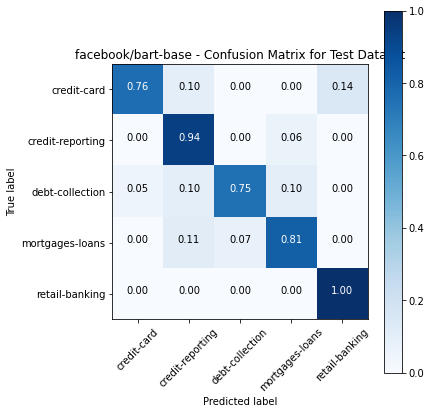

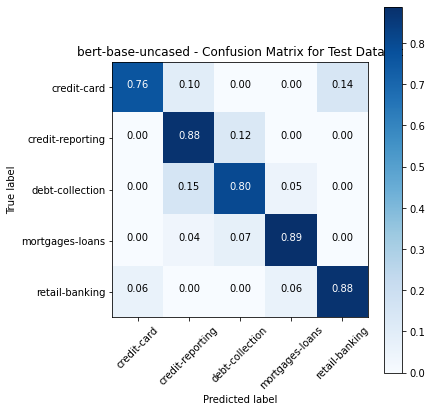

In [19]:
model_names = ["facebook/bart-base", "bert-base-uncased"]
compare_models(model_names)

# 5. Evaluation
It is quite difficult to conduct a fair comparison of BART pre-training objectives against the previously employed pre-training objectives. There are differences in training data and resources, model architectural differences for example.
Note that different models report different metrics: F1, EM, accuracy, Matthews correlation coefficient (MCC), mismatched version of MNLI (mnli-mm),  matched version of MNLI (mnli-m), Perplexities (PPL).

## 5.1 Evaluation metrics reported in the paper
Two evaluations were performed. One on the base model and another evaluation of a larger model.
### 5.1.1 Base model evaluation
BART  implementations were compared with published numbers from BERT on similar training. BART was trained on 1M steps of books and Wikipedia data.All the following models are of base size.  There are 6 encoder and 6 decoder layers, with a hidden size of 768. That is 768 sized vector per word in the input sentence.

Different BART pre-training methods were evaluated
- Token Masking
- Token Deletion
- Text Infilling 
- Document Rotation 
- Sentence Shuffling
- Text Infilling + Sentence Shuffling 

The following are the list of models compared against BART

- BERT base 
- Language Model Similarly to GPT
- Permuted language Model Based on XLNet
- Masked language Model Following BERT
- Multitask Masked language Model As in UniLM
- Masked Seq-to-Seq inspired by MASS

The following is the result of the comparison of multiple data sets.

Table 1: Base model evaulation

![Table 1](images/table1.png)
Performance varies across tasks, however BART models with text infilling demonstrate consistently strong performance.


### 5.1.2 Large scale evaluation
BART was trained on the same scale as the RoBERTa model.Therefore a  large model with 12 encoder layers and 12 decoder layers with a hidden size of 1024. The training was performed on a batch size of 8000, and train the model for 500000 steps, similar to RoBERTa.
The following is the evaluatation of BART against the following models for discriminative tasks

Table 2: Large model evaluation for discriminative tasks.

![Table 2](images/table2.png)
BART performance is comparable to that of RoBERTa and XLNet. Therefore, can derive that BART’s uni-directional decoder layers do not reduce performance on discriminative tasks.

The following is the evaluation of BART against the following models for summarization tasks.

Table 3: Large model evaluation for summarization tasks with ROUGE scores.

![Table 3](images/table3.png)
As expected, BART outperforms previous work on summarization.

## 5.1 Evaluation on a custom dataset for classification

In section 4.1.2.2 an experiment was carried out on a classification task on a custom dataset. The purpose of the classification was to identify the most likely product category label given a complaint narrative.

The goal was to compare the classification performance of BART and BERT.
BART should consistently perform all downstream tasks. BERT is supposed to perform better on discriminative tasks than BART.

The following are the Weighted average metrics for the BERT base and BART base. Refer to section 4.1.2.2 for detailed scores per class.

| Model| Accuracy | F1 | Recall | Precision |
| :-: | :-: | :-: |:-: |:-: |
| BART base | 0.84 | 0.84| 0.84| 0.86 |
| BERT base | 0.84 | 0.84| 0.84| 0.85 |

Surprisingly, BART performed better than BERT on this particular dataset. BERT was expected to perform better than BART on discriminative tasks like classification. All the performance metrics were identical except for precision where BART was 0.01 better. The difference in performance is not significant. However, it is a testament to the fact that BART is a consistently performing model over multiple downstream tasks.

# 6. Conclusion and Future Direction

BART architecture is not that much different from the standard transformer architecture. The main experimentation was around pre-training. 
The paper's experiment on pretraining tasks may be concluded as follows: 

- The effectiveness of pretraining approaches varies greatly depending on the task. However, the BART models with text infilling achieved consistently stronger performance.
- BART consistently delivers strong results. Therefore, suitable as a generic model.
- The importance of token masking cannot be overstated. 
- Pretraining from left to right enhances generation. 
- Architectural considerations are also important other than the pre-training tasks. For example, relative position embeddings and segment-level recurrence impact the performance


The strength of BART is also its weakness. The pretraining experimentation was to generate a generic language model that could be used across multiple downstream fine-tuning end tasks. Future work should then explore new methods of corrupting documents, maybe with the intent of being specific for certain downstream fine-tuning end tasks than being generic.

# References:

[1]:  Devlin, J., Chang, M., Lee, K., & Toutanova, K. (2019). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. ArXiv, abs/1810.04805.

[2]:  Liu, Yinhan et al. “RoBERTa: A Robustly Optimized BERT Pretraining Approach.” ArXiv abs/1907.11692 (2019): n. pag.

[3]:  Yang, Zhilin et al. “XLNet: Generalized Autoregressive Pretraining for Language Understanding.” NeurIPS (2019).

[4]: Lewis, M., Liu, Y., Goyal, N., Ghazvininejad, M., Mohamed, A., Levy, O., Stoyanov, V., & Zettlemoyer, L. (2020). BART: Denoising Sequence-to-Sequence Pre-training for Natural Language Generation, Translation, and Comprehension. ArXiv, abs/1910.13461.

[5]:  Jacob Devlin, Ming-Wei Chang, Kenton Lee, and Kristina Toutanova. BERT: Pre-training of deep bidirectional transformers for language understanding. In Proceedings of the 2019 Conference of the North American Chapter of the Association for Computational Linguistics: Human Language Technologies, Volume 1 (Long and Short Papers), pp. 4171–
4186, Minneapolis, Minnesota, June 2019. Association for Computational Linguistics. doi: 10.18653/v1/N19-1423. URL https://www.aclweb.org/anthology/N19-1423.

[6]:  L. Dong, N. Yang, W. Wang, F. Wei, X. Liu, Y. Wang, J. Gao, M. Zhou, and H. Hon (2019) Unified language model pre-training for natural language understanding and generation. arXiv preprint arXiv:1905.03197. 

[7]:  Alec Radford, Karthik Narasimhan, Tim Salimans, and Ilya Sutskever. Improving language understanding by generative pre-training. URL https://s3-us-west-2. amazonaws. com/openaiassets/researchcovers/languageunsupervised/languageunderstanding paper. pdf, 2018.